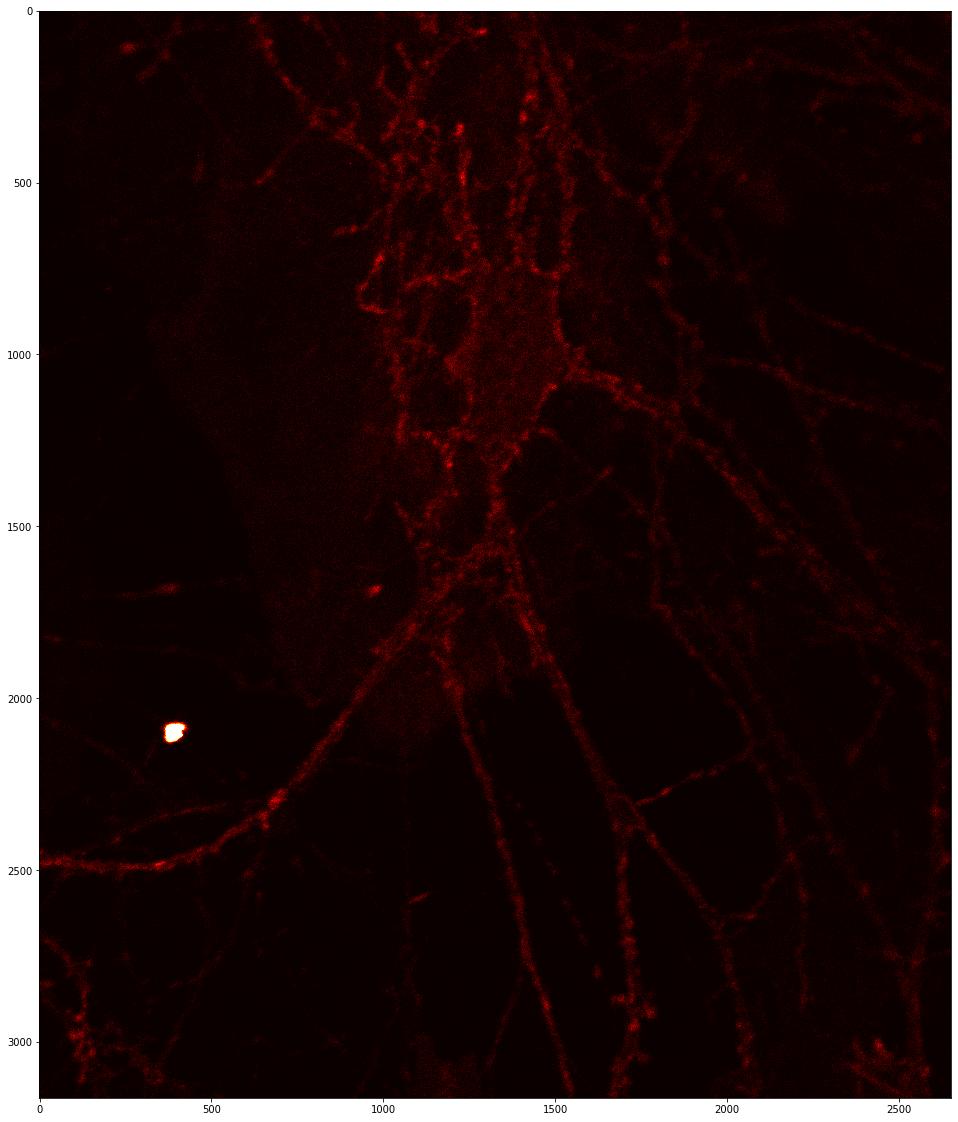

In [11]:
import czifile
import numpy as np
import matplotlib.pyplot as plt
czi = czifile.imread("data\RT_HC_20X_12-4-19_PLMD94.czi")
img = czi[0,0,0,:,0,:,:,0]
img = img[0,:,:]
plt.figure(figsize = (20,20))
plt.imshow(img, cmap = "hot")

(array([4.00000e+00, 1.40000e+01, 2.90000e+01, 6.00000e+01, 2.50000e+01,
        2.61000e+02, 1.05000e+02, 4.96000e+02, 4.65000e+02, 1.09000e+03,
        1.94000e+03, 1.60500e+03, 3.63600e+03, 4.00200e+03, 6.95200e+03,
        7.71100e+03, 1.26740e+04, 1.31860e+04, 2.26330e+04, 1.92070e+04,
        3.60810e+04, 4.53200e+04, 3.33530e+04, 6.63490e+04, 4.35720e+04,
        8.85080e+04, 6.69670e+04, 1.10688e+05, 9.59430e+04, 1.32674e+05,
        1.46439e+05, 1.16510e+05, 1.67350e+05, 1.07860e+05, 1.83018e+05,
        1.05711e+05, 1.87291e+05, 1.27611e+05, 1.77346e+05, 1.35662e+05,
        1.67392e+05, 1.60897e+05, 1.03725e+05, 1.44287e+05, 7.69130e+04,
        1.25852e+05, 7.36310e+04, 1.03750e+05, 7.33300e+04, 8.32680e+04,
        7.23360e+04, 4.56320e+04, 5.94120e+04, 2.84390e+04, 4.58910e+04,
        2.57610e+04, 3.53560e+04, 2.43640e+04, 2.73600e+04, 1.61400e+04,
        2.21870e+04, 1.96830e+04, 1.00270e+04, 1.69480e+04, 1.00750e+04,
        1.38470e+04, 9.88100e+03, 1.23060e+04, 7.73

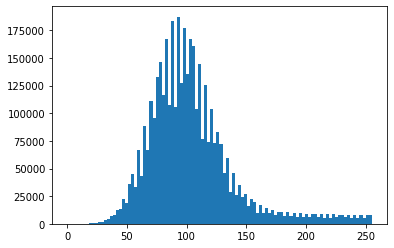

In [3]:
plt.hist(img.flat, bins=100, range=(0, 255)) 

In [7]:
from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=4, patch_distance=2, multichannel=True)

(array([0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 2.00000e+00, 2.00000e+01, 2.50000e+01, 3.30000e+01,
        4.80000e+01, 6.30000e+01, 7.00000e+01, 7.70000e+01, 1.30000e+02,
        1.09000e+02, 1.87000e+02, 1.79000e+02, 2.82000e+02, 2.89000e+02,
        3.87000e+02, 4.20000e+02, 4.45000e+02, 5.63000e+02, 5.47000e+02,
        7.61000e+02, 6.77000e+02, 9.02000e+02, 8.70000e+02, 1.11600e+03,
        1.26900e+03, 1.95100e+03, 6.41600e+03, 2.34890e+04, 6.63900e+04,
        1.40295e+05, 2.17461e+05, 2.51568e+05, 2.21833e+05, 1.59534e+05,
        1.04173e+05, 7.33640e+04, 6.06460e+04, 5.64380e+04, 5.40140e+04,
        5.26390e+04, 5.09560e+04, 4.98630e+04, 4.78260e+04, 4.70450e+04,
        4.64950e+04, 4.53060e+04, 4.39030e+04, 4.18860e+04, 3.94330e+04,
        3.69540e+04, 3.45720e+04, 3.24930e+04, 3.09060e+04, 2.94240e+04,
        2.87220e+04, 2.81450e+04, 2.74020e+04, 2.68820e+04, 2.62390e+04,
        2.60530e+04, 2.54410e+04, 2.54080e+04, 2.53

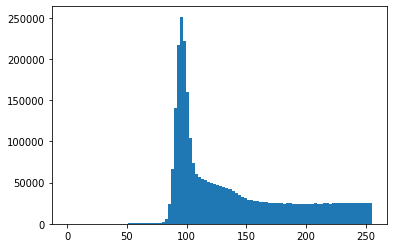

In [8]:
plt.hist(denoise_img.flat, bins=100, range=(0, 255)) 

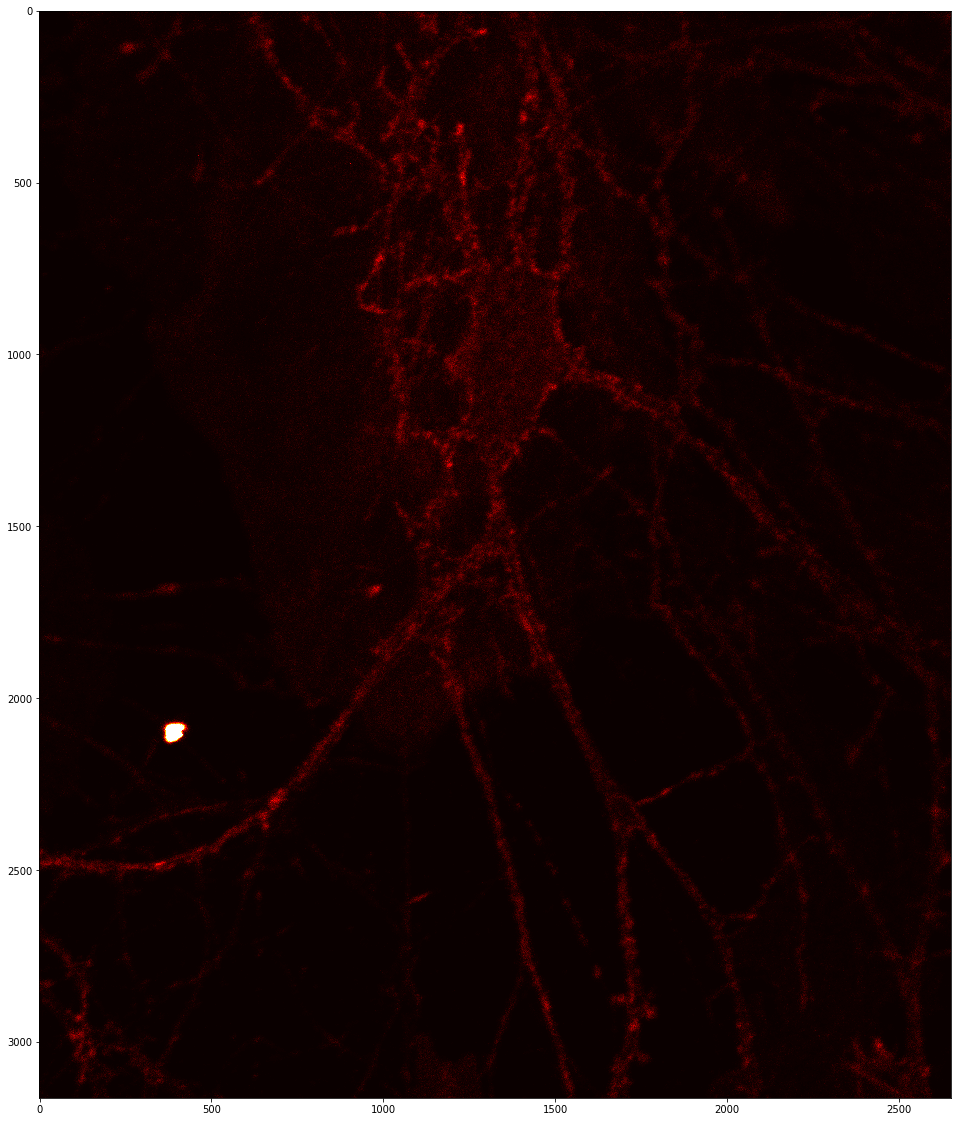

In [25]:
plt.figure(figsize = (20,20))
plt.imshow(denoise_img, cmap = "hot")

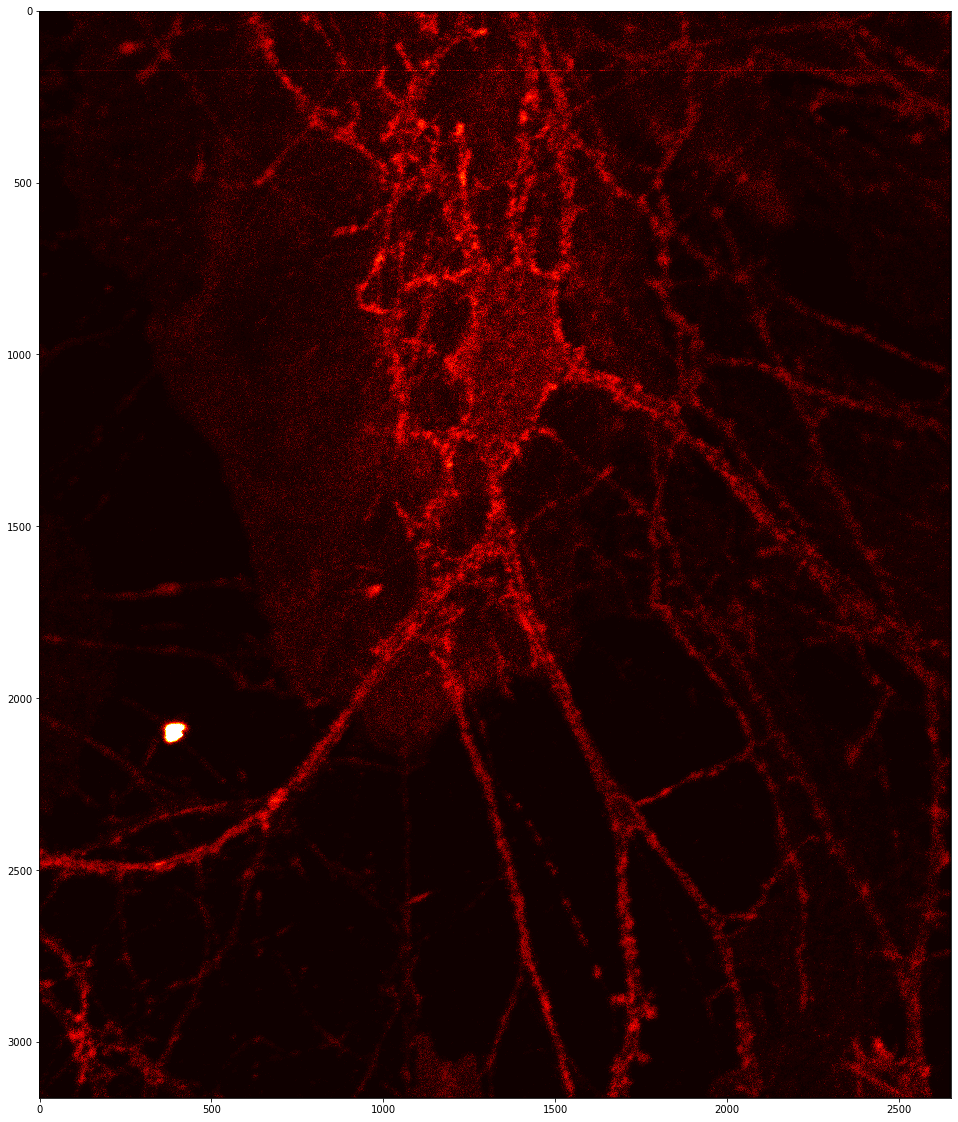

In [26]:
from skimage import exposure   #Contains functions for hist. equalization
denoise_img = denoise_img/np.max(denoise_img)
#eq_img = exposure.equalize_hist(denoise_img)
eq_img = exposure.equalize_adapthist(denoise_img)
plt.figure(figsize = (20,20))
plt.imshow(eq_img, cmap = "hot")




(array([   4402., 1755831.,  755799.,  638929.,  614940.,  494215.,
         362597.,  275054.,  223014.,  192663.,  170862.,  154664.,
         140826.,  129392.,  118797.,  109159.,  102082.,   94423.,
          88233.,   82940.,   77728.,   72730.,   69087.,   65040.,
          62012.,   58588.,   55381.,   52788.,   50415.,   47673.,
          45422.,   43775.,   41512.,   40224.,   38250.,   36999.,
          35395.,   33981.,   32777.,   31438.,   29891.,   28870.,
          27799.,   26966.,   25726.,   25113.,   23935.,   23127.,
          22202.,   21355.,   20541.,   20029.,   19361.,   18814.,
          18105.,   17373.,   17009.,   16226.,   15434.,   15129.,
          14573.,   14230.,   13688.,   13179.,   12780.,   12313.,
          11924.,   11324.,   11045.,   10921.,   10547.,   10036.,
           9638.,    9219.,    8990.,    8614.,    8583.,    8127.,
           7861.,    7532.,    7351.,    7109.,    6943.,    6619.,
           6501.,    6392.,    5878.,    5934., 

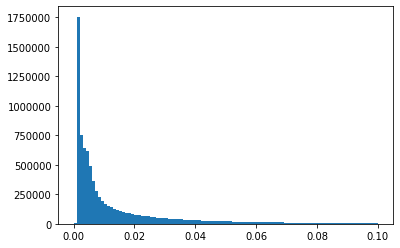

In [31]:
plt.hist(denoise_img.flat, bins=100, range=(0., .1))